<a href="https://colab.research.google.com/github/zairapg/hiperblog/blob/main/Actividad_3_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Añadir blockquote


# EVALUACION DEL MODELO

   Zaira Pizo Gurrute.

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [76]:
!pip install ucimlrepo
!pip install openpyxl

In [77]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import openpyxl as xl
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


# 1. Se realiza el cargue del conjunto de datos en un data frame de pandas (data).


from ucimlrepo import fetch_ucirepo

# fetch dataset
skin_segmentation = fetch_ucirepo(id=229)

# data (as pandas dataframes)
X = skin_segmentation.data.features
y = skin_segmentation.data.targets

# metadata
print(skin_segmentation.metadata)

# variable information
print(skin_segmentation.variables)

data = X.copy()
data['target'] = y

# Imprimir los primeros registros para verificar
print(data.head())

data.to_excel(r'D:\segmentation.xlsx', index=False)





{'uci_id': 229, 'name': 'Skin Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/229/skin+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/229/data.csv', 'abstract': 'The Skin Segmentation dataset is constructed over B, G, R color space. Skin and Nonskin dataset is generated using skin textures from face images of diversity of age, gender, and race people.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Univariate'], 'num_instances': 245057, 'num_features': 3, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5T30C', 'creators': ['Rajen Bhatt', 'Abhinav Dhall'], 'intro_paper': None, 'additional_info': {'summary': 'The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, midd

In [78]:
#Cuál es el número de registros? #Cuál es el número de atributos?

shape = data.shape
print ('Se establece el numero de registros y numero de atributos en su orden',shape)

Se establece el numero de registros y numero de atributos en su orden (245057, 4)


In [79]:
#Cual es el tipo de los atributos?
print ('Para el total de atributos se identifica el tipo de dato por cada atributo')
data.dtypes

Para el total de atributos se identifica el tipo de dato por cada atributo


,0
B,int64
G,int64
R,int64
target,int64


In [80]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,B,G,R,target
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


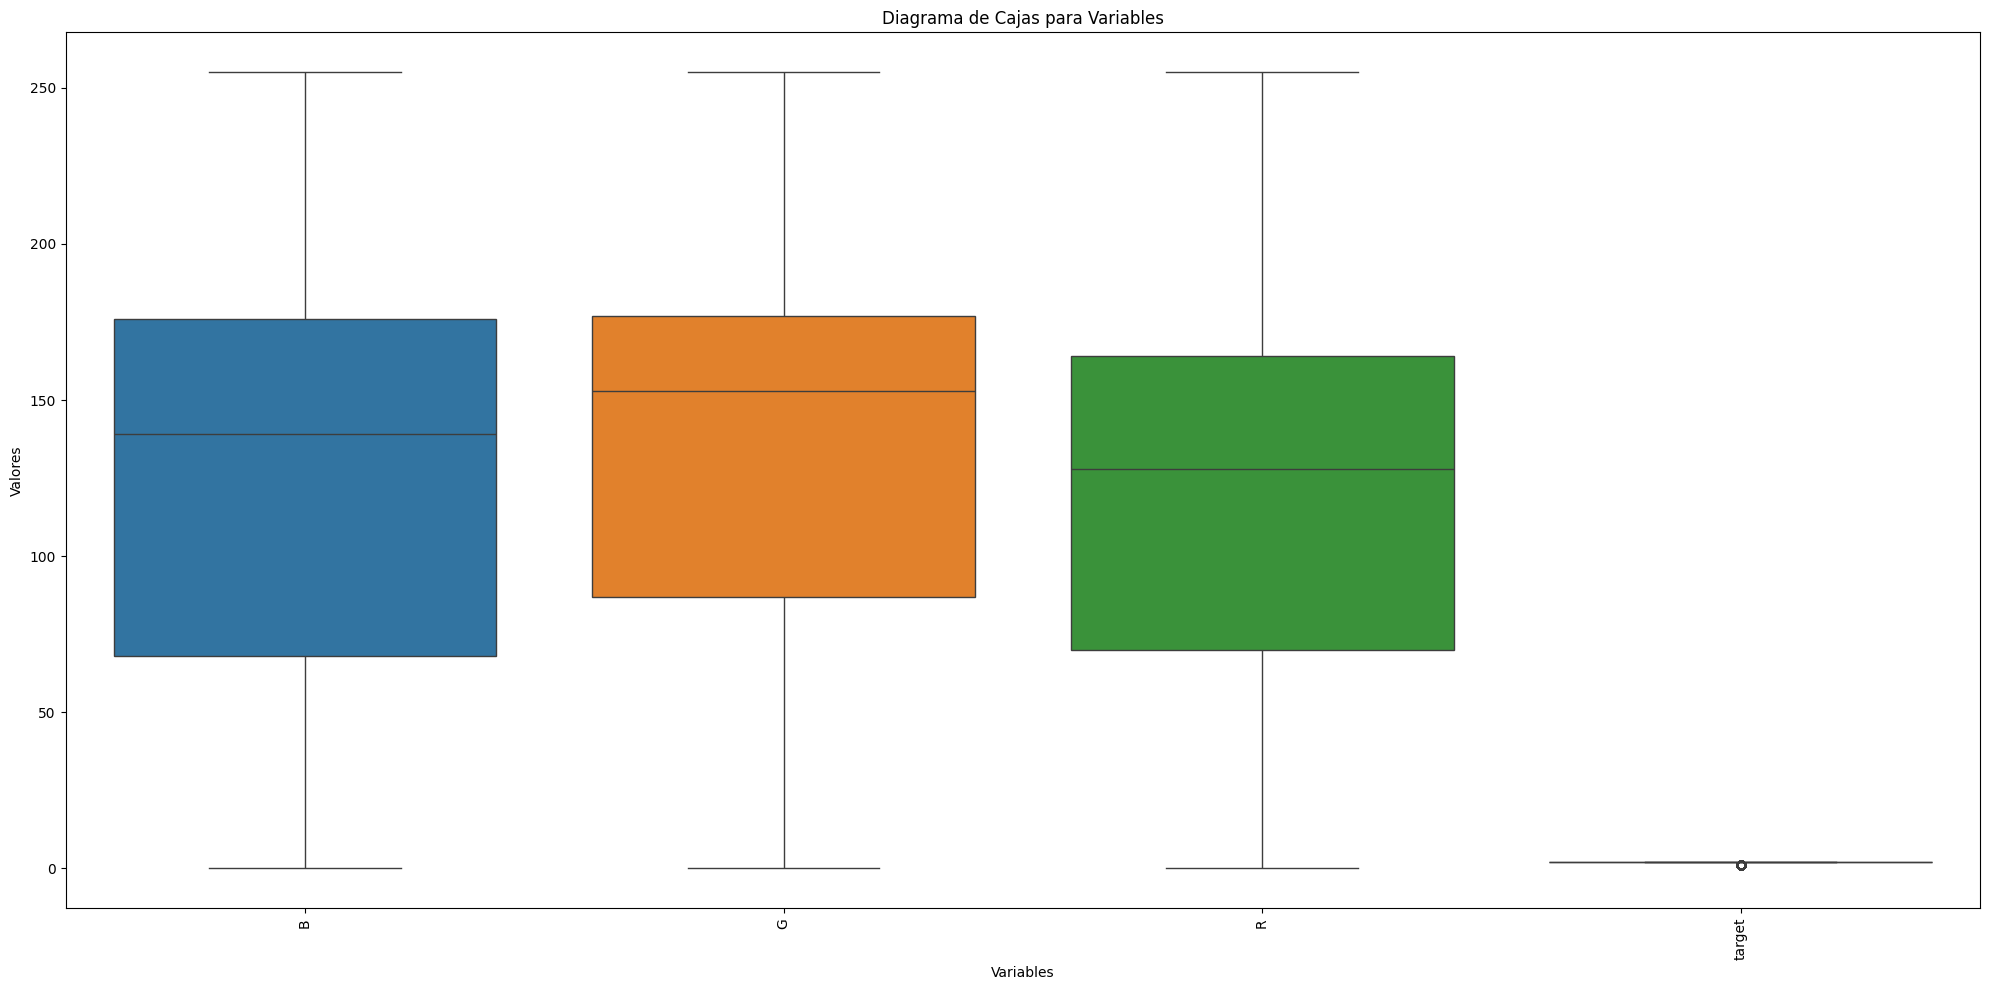

In [81]:
plt.figure(figsize=(20,10))  # Ajustar tamaño de la figura
sns.boxplot(data=data)

# Configuración de la gráfica
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para que se vean bien
plt.title("Diagrama de Cajas para Variables")
plt.xlabel("Variables")
plt.ylabel("Valores")

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()


In [82]:
#Medida de centralidad para atributos categóricos:
data.mode()

,B,G,R,target
0,178,178,0,2


In [83]:
data.corr()


,B,G,R,target
B,1.000000,0.855250,0.496376,0.092030
G,0.855250,1.000000,0.660098,-0.120327
R,0.496376,0.660098,1.000000,-0.569958
target,0.092030,-0.120327,-0.569958,1.000000


In [84]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()


# Paso 1: Calcular la matriz de correlación
corr_matrix = data.corr()

# Paso 2: Filtrar las correlaciones mayores a 0.85
corr_above_085 = corr_matrix[(corr_matrix.abs() > 0.85)]

# Paso 3: Filtrar las correlaciones menores a 0.85
corr_below_085 = corr_matrix[(corr_matrix.abs() <= -0.85)]

# Mostrar los resultados
print("Correlaciones mayores a 0.85:")
print(corr_above_085)

print("\nCorrelaciones menores o iguales a 0.85:")
print(corr_below_085)



Correlaciones mayores a 0.85:
              B        G    R  target
B       1.00000  0.85525  NaN     NaN
G       0.85525  1.00000  NaN     NaN
R           NaN      NaN  1.0     NaN
target      NaN      NaN  NaN     1.0

Correlaciones menores o iguales a 0.85:
         B   G   R  target
B      NaN NaN NaN     NaN
G      NaN NaN NaN     NaN
R      NaN NaN NaN     NaN
target NaN NaN NaN     NaN


In [85]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

0

In [86]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
B,0
G,0
R,0
target,0


In [87]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['target'].value_counts())

target
2    194198
1     50859
Name: count, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.









## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo target a partir de los valores de los demás atributos. Es decir, se va a predecir tumores como benignos o malignos. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de datos de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [88]:
# Se separan los datos en conjunto de entrenamiento y prueba.

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['target'])
y = data['target']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Ver la forma de los conjuntos de entrenamiento y prueba
print(f'Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}')

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


Conjunto de entrenamiento: (171539, 3), Conjunto de prueba: (73518, 3)
(171539, 3) (171539,)
(73518, 3) (73518,)


In [89]:
# Construccion del modelo de clasificación por regresión logística).
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

# Creción del modelo de regresión logística
model = LogisticRegression(max_iter=500)  # Numero de iteraciones para converger

# Entrenamiento del modelo con los datos de entrenamiento
model.fit(X_train, y_train)





LogisticRegression(max_iter=500)

In [90]:
from sklearn.metrics import accuracy_score
# Se Prueba el modelo utilizando los datos de prueba.

predictions = model.predict(X_test)
predictions





array([2, 1, 1, ..., 2, 2, 1])

In [91]:
# Reportar la medida accuracy para el modelo construido.
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de prueba
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, predictions)

# Mostrar la precisión
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.92


In [92]:
#Establecer datos atipiticos, mediante el uso de Q
# Función para detectar outliers usando el IQR
def detectar_outliers(df):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Aplicar la detección de outliers
df_no_outliers = detectar_outliers(data)

# Verificar las dimensiones después de eliminar los outliers
df_no_outliers.shape

(194198, 4)

 **Cálculos de las métricas para los esquemas de validación K-Fold y Random Subsampling**

In [93]:
# Se crea una unica función para evaluar el rendimiento del modelo de clasificación (Todas las metricas)
# Definición de la función de evaluación
# Se crea una única función para evaluar el rendimiento del modelo de clasificación (todas las métricas)
def eval_modelo(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1]) if cm[0,0] + cm[0,1] != 0 else 0
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Mostrar las métricas calculadas
    print(f"Matriz de Confusión:\n{cm}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity (Recall): {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F1-Score: {f1}")

    return accuracy, sensitivity, specificity, precision, f1, cm  # Devolver también la matriz de confusión

# Arreglos para los resultados
kfolds_resultados = []
rsubs_resultados = []
matrices_confusion_kfold = []  # Matriz para almacenar las matrices de confusión de K-Fold
matrices_confusion_rsubs = []  # Matriz Para almacenar las matrices de confusión de Random Subsampling

# 1. validación cruzada por N-folds con N=10
kf = KFold(n_splits=10, shuffle=True, random_state=50)
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluar el modelo y obtener las métricas
    accuracy, sensitivity, specificity, precision, f1, cm = eval_modelo(y_test, y_pred)

    print("\n:Repetición #", fold)

    # Guardar los resultados de las métricas
    kfolds_resultados.append([fold, accuracy, sensitivity, specificity, precision, f1])

    # Guardar la matriz de confusión N-folds
    matrices_confusion_kfold.append(cm)

# 2. Evaluación con Random Subsampling
# random subsampling utilizando una partición 70/30 de los datos disponibles con 10 iteraciones
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluar el modelo y obtener las métricas
    accuracy, sensitivity, specificity, precision, f1, cm = eval_modelo(y_test, y_pred)

    print("\n: #", i)

    # Guardar los resultados de las métricas
    rsubs_resultados.append([i+1, accuracy, sensitivity, specificity, precision, f1])

    # Guardar la matriz de confusión Random Subsampling
    matrices_confusion_rsubs.append(cm)


    # Calcular la matriz de confusión promedio para K-Fold Cross-Validation
    promedio_cm_kfold = np.mean(matrices_confusion_kfold, axis=0)

    # Calcular la matriz de confusión promedio para Random Subsampling
    promedio_cm_rsubs = np.mean(matrices_confusion_rsubs, axis=0)


Matriz de Confusión:
[[ 4215   894]
 [ 1054 18343]]
Accuracy: 0.9205092630376235
Sensitivity (Recall): 0.825014679976512
Specificity: 0.825014679976512
Precision: 0.7999620421332321
F1-Score: 0.8122952399306225

:Repetición # 1
Matriz de Confusión:
[[ 4169   853]
 [ 1051 18433]]
Accuracy: 0.9223047416959113
Sensitivity (Recall): 0.830147351652728
Specificity: 0.830147351652728
Precision: 0.7986590038314176
F1-Score: 0.8140988088264011

:Repetición # 2
Matriz de Confusión:
[[ 4179   940]
 [ 1091 18296]]
Accuracy: 0.9171223373867624
Sensitivity (Recall): 0.8163703848407892
Specificity: 0.8163703848407892
Precision: 0.7929791271347248
F1-Score: 0.8045047646549235

:Repetición # 3
Matriz de Confusión:
[[ 4132   913]
 [ 1105 18356]]
Accuracy: 0.9176528197176201
Sensitivity (Recall): 0.8190287413280476
Specificity: 0.8190287413280476
Precision: 0.7890013366431163
F1-Score: 0.8037346819684886

:Repetición # 4
Matriz de Confusión:
[[ 4163   967]
 [ 1152 18224]]
Accuracy: 0.9135313800701869
Sen

In [94]:

# Crear los DataFrames para mostrar en tabla
kfolds_data = pd.DataFrame(kfolds_resultados, columns=["Fold", "Accuracy", "Sensitivity", "Specificity", "Precision", "F1-Score"])
r_subsampling_data = pd.DataFrame(rsubs_resultados, columns=["Repetición", "Accuracy", "Sensitivity", "Specificity", "Precision", "F1-Score"])

# Imprimir las tablas de resultados
print("\nResultados de K-Fold Cross-Validation:")
print(kfolds_data)

print("\nResultados de Random Subsampling:")
print(r_subsampling_data)



print("\nMatriz de Confusión Promedio para K-Fold Cross-Validation:")
print(promedio_cm_kfold)


print("\nMatriz de Confusión Promedio para Random Subsampling:")
print(promedio_cm_rsubs)


Resultados de K-Fold Cross-Validation:
   Fold  Accuracy  Sensitivity  Specificity  Precision  F1-Score
0     1  0.920509     0.825015     0.825015   0.799962  0.812295
1     2  0.922305     0.830147     0.830147   0.798659  0.814099
2     3  0.917122     0.816370     0.816370   0.792979  0.804505
3     4  0.917653     0.819029     0.819029   0.789001  0.803735
4     5  0.913531     0.811501     0.811501   0.783255  0.797128
5     6  0.918183     0.825949     0.825949   0.787776  0.806411
6     7  0.920387     0.830383     0.830383   0.798242  0.813996
7     8  0.921934     0.829220     0.829220   0.797931  0.813275
8     9  0.919567     0.823997     0.823997   0.792662  0.808026
9    10  0.916711     0.823518     0.823518   0.790987  0.806925

Resultados de Random Subsampling:
   Repetición  Accuracy  Sensitivity  Specificity  Precision  F1-Score
0           1  0.918578     0.825346     0.825346   0.791214  0.807919
1           2  0.919054     0.828840     0.828840   0.794397  0.8112

**Analisis General**
Ambos enfoques ofrecen un rendimiento similar en terminos de accuracy, precision, sensitivity y F1-Score, pero Random Subsampling muestra una ligera mejora en accuracy.

Sin embargo, K-Fold Cross-Validation tiene la ventaja de ser mas estable, mientras que Random Subsampling tiene un ligero aumento en la variabilidad entre repeticiones.

Si se busca estabilidad y una estimacion mas robusta del rendimiento del modelo, K-Fold Cross-Validation es preferible.

Si el tiempo de computo es una restriccion importante o si se requiere una evaluacion rapida, Random Subsampling puede ser una opcion viable, aunque con el riesgo de mayor variabilidad.

En cuanto al Impacto de la matriz de confusion: La Matriz de Confusion de K-Fold Cross-Validation muestra un mejor balance entre los falsos positivos y falsos negativos, mientras que la de Random Subsampling
refleja un mayor numero de falsos positivos y falsos negativos. Esto indica que K-Fold tiene un rendimiento ligeramente mas equilibrado en la clasificación de las clases.


# Fin del programa